In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train = train.drop("Id",axis = 1)
test = test.drop("Id",axis = 1)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
#processing the data to remove unwanted columns and fill the missing values
def preprocessing(data):
  column_drop_threshold = 20 #at how much percentage missing values the column will be dropped
  for i,column_name in enumerate(data.columns):
      missing_values_count = data[column_name].isnull().sum()
      most_common_value_percentage = data[column_name].value_counts(normalize=True).max() #for dropping columns with almost similar values
      if missing_values_count*100/data.shape[0] > column_drop_threshold or most_common_value_percentage*100 > 70:
          data = data.drop(column_name,axis = 1)
      else:
          numeric_column = pd.to_numeric(data[column_name], errors='coerce')
          # Check if there are only numeric values or NaN values in the column
          if numeric_column.isna().all():
              data = data.drop(column_name,axis = 1)

  imputer = SimpleImputer(strategy='mean')  #to fill the missing values
  data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
  return data
data = preprocessing(train)
data.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,150.0,...,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,284.0,...,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,434.0,...,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,540.0,...,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,490.0,...,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,12.0,2008.0,250000.0


In [62]:
data = preprocessing(train)
X_train = data.iloc[:,:-1]
y_train = data.iloc[:,-1]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape)

# KNN Regression
k = 4  # Number of neighbors (you can choose the best value through hyperparameter tuning)
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN regressor on the training set
knn_model.fit(X_train_scaled, y_train)

# Predictions on the train set
y_pred = knn_model.predict(X_train_scaled)

# Evaluating the model
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


(1460, 27)
Mean Squared Error: 804947214.0427226
R-squared: 0.8723681310782132


[ 0.07337496 -0.22937175 -0.20714171  0.65147924 -0.51719981  1.05099379
  0.87866809  0.51141841  0.57542484 -0.94459061 -0.45930254 -0.79343379
  1.16185159  0.37033344  1.10781015  0.78974052  1.22758538  0.16377912
  0.91220977 -0.95122649  1.02115667  0.31172464  1.29477373 -0.75217584
  0.21650316 -1.5991111   0.13877749]
[ 0.07337496 -0.22937175 -0.20714171  0.65147924 -0.51719981  1.05099379
  0.87866809  0.51141841  0.57542484 -0.94459061 -0.45930254 -0.79343379
  1.16185159  0.37033344  1.10781015  0.78974052  1.22758538  0.16377912
  0.91220977 -0.95122649  1.02115667  0.31172464  1.85441989 -0.75217584
  0.21650316 -1.5991111   0.13877749]
[ 0.07337496 -0.22937175 -0.20714171  0.65147924 -0.51719981  1.05099379
  0.87866809  0.51141841  0.57542484 -0.94459061 -0.45930254 -0.79343379
  1.16185159  0.37033344  1.10781015  0.78974052  1.22758538  0.16377912
  0.91220977 -0.95122649  1.02115667  0.31172464  2.96977416 -0.75217584
  0.21650316 -1.5991111   0.13877749]
[ 0.073374

In [36]:
#now for the test data
X_test = test[X_train.columns]
# X_test = X_test.sort_index()
imputer = SimpleImputer(strategy='mean')  #to fill the missing values
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
y_pred = knn_model.predict(X_test_scaled)
print(y_pred)
test["SalePrice"] = y_pred
test.to_csv("predicted test data.csv",index = False)

[116600.  145350.  199250.  ... 191875.  103250.  229802.5]


['knn_model.joblib']

c:\Users\Arbaaz Tanveer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


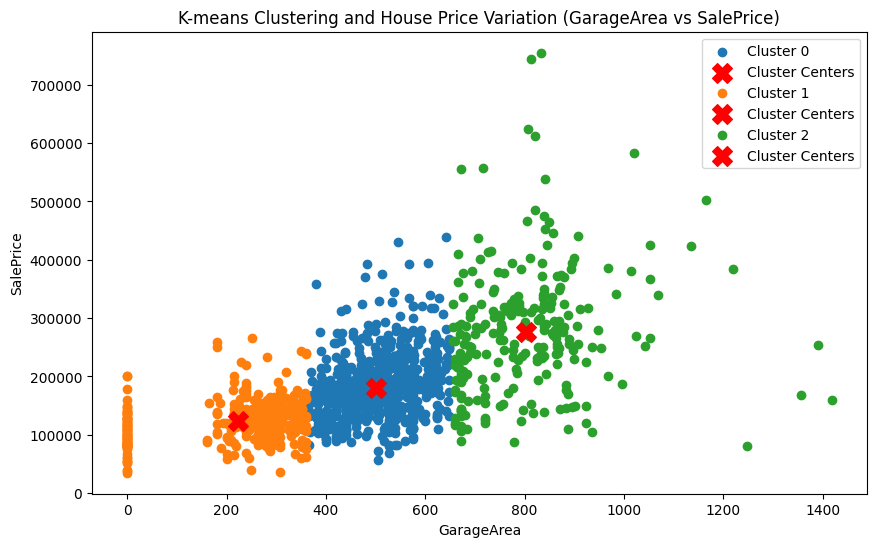

In [37]:
input_column = 'GarageArea'
target_column = 'SalePrice'

# Extract the selected column and house prices
X = data[[input_column]]
y = data[target_column]

# K-means clustering
n_clusters = 3  # You can choose the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Scatter plot
plt.figure(figsize=(10, 6))

cluster_centers = kmeans.cluster_centers_
# Plot each cluster with a different color
for cluster in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data[input_column], cluster_data[target_column], label=f'Cluster {cluster}')
    plt.scatter(cluster_centers[cluster, 0], cluster_data[target_column].mean(), marker='X', s=200, c='red', label='Cluster Centers')
# Plot the cluster centers
# cluster_centers = kmeans.cluster_centers_
# plt.scatter(cluster_centers[:, 0], [y.mean()]*len(cluster_centers), marker='X', s=200, c='red', label='Cluster Centers')

plt.title(f'K-means Clustering and House Price Variation ({input_column} vs {target_column})')
plt.xlabel(input_column)
plt.ylabel(target_column)
plt.legend()
plt.show()


#here the  house price is increasing with GarageArea similarly other conclusion can be checked with each column individually

In [12]:

import gradio as gr

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

In [64]:
#now for the gradio part
import gradio as gr
# gradio_data = X_train.iloc[:,:]
data_fill_index = 0
past_predictions = []
def updater(rest_of_data,LotFrontage,LotArea,GrLivArea,GarageArea,YearBuilt,YrSold):
    
    global pred
    gradio_data = X_train.iloc[:,:]
    gradio_data.loc[rest_of_data,"LotFrontage"] = LotFrontage
    gradio_data.loc[rest_of_data,"LotArea"] = LotArea
    gradio_data.loc[rest_of_data,"GrLivArea"] = GrLivArea
    gradio_data.loc[rest_of_data,"GarageArea"] = GarageArea
    gradio_data.loc[rest_of_data,"YearBuilt"] = YearBuilt
    gradio_data.loc[rest_of_data,"YrSold"] = YrSold
    scaler = StandardScaler()
    gradio_data_scaled = scaler.fit_transform(gradio_data)
    pred = knn_model.predict(gradio_data_scaled[rest_of_data,:].reshape(1,-1))
    print(gradio_data_scaled[rest_of_data,:])
    past_predictions.append(pred[0])
    global data_fill_index
    data_fill_index = rest_of_data
    return f"previous prices = {past_predictions[:-1]},new prediction = {pred[0]}"

interface = gr.Interface(fn=updater,
                         inputs=[gr.Slider(0,1460,label = "rest_of_data_fill_index"),
                                 gr.Slider(X_train["LotFrontage"].min(),X_train["LotFrontage"].max(),label = "LotFrontage"),
                                 gr.Slider(X_train["LotArea"].min(),X_train["LotArea"].max(),label = "LotArea"),
                                 gr.Slider(X_train["GrLivArea"].min(),X_train["GrLivArea"].max(),label = "GrLivArea"),
                                 gr.Slider(X_train["GarageArea"].min(),X_train["GarageArea"].max(),label = "GarageArea"),
                                 gr.Slider(X_train["YearBuilt"].min(),X_train["YearBuilt"].max(),label = "YearBuilt"),
                                 gr.Slider(X_train["YrSold"].min(),X_train["YrSold"].max(),label = "YrSold"),
                                 ],
                         outputs='text',title = "House Price Predicter")
interface.launch()


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


[ 0.07337496 -2.22252573 -0.92261754  0.65147924 -0.51719981 -3.26598085
  0.87866809  0.51141841  0.57542484 -0.94459061 -0.45930254 -0.79343379
  1.16185159 -2.24400992  1.10781015  0.78974052  1.22758538  0.16377912
  0.91220977 -0.95122649  1.02115667  0.31172464 -2.1961964  -0.75217584
  0.21650316 -1.5991111  -1.36750259]
